In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
C:\Users\Antonio Ferrazzoli\Projetos Python\Pós Tech\Tech Challenge\Bases\ExpVinho.csv


In [26]:
dados = pd.read_csv('C:\\Users\\Antonio Ferrazzoli\\Projetos Python\\Pós Tech\\Tech Challenge\\Bases\\ExpVinho.csv',sep=';')
dados

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,Tuvalu,0,0,0,0,0,0,0,0,...,0,0,0,0,2,4,0,0,0,0
124,125,Uruguai,0,0,0,0,0,0,0,0,...,7711,29617,6180,18497,0,0,136774,149842,637117,997367
125,126,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,0,0,18,31,0,0,0,0
126,127,Venezuela,0,0,3200,2000,1350,750,11700,6458,...,71,355,0,0,4086,9808,26415,35944,23220,32351


In [27]:
dados = dados.melt(id_vars=['País'],var_name='data',value_name='qtd')
dados

,País,data,qtd
0,Afeganistão,Id,1
1,África do Sul,Id,2
2,"Alemanha, República Democrática",Id,3
3,Angola,Id,4
4,Anguilla,Id,5
...,...,...,...
13691,Tuvalu,2022.1,0
13692,Uruguai,2022.1,997367
13693,Vanuatu,2022.1,0
13694,Venezuela,2022.1,32351


In [28]:
dados = dados[dados.data.str.contains("Id") == False]
dados

,País,data,qtd
128,Afeganistão,1970,0
129,África do Sul,1970,0
130,"Alemanha, República Democrática",1970,0
131,Angola,1970,0
132,Anguilla,1970,0
...,...,...,...
13691,Tuvalu,2022.1,0
13692,Uruguai,2022.1,997367
13693,Vanuatu,2022.1,0
13694,Venezuela,2022.1,32351


In [29]:
def determinar_medida(row):
    if row['data'][-2:] == '.1':
        return 'Valor'
    else:
        return 'Quantidade'

In [30]:
dados['Medida'] = dados.apply(determinar_medida, axis=1)

C:\Users\Antonio Ferrazzoli\AppData\Local\Temp\ipykernel_11368\980305285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Medida'] = dados.apply(determinar_medida, axis=1)


In [31]:
dados

,País,data,qtd,Medida
128,Afeganistão,1970,0,Quantidade
129,África do Sul,1970,0,Quantidade
130,"Alemanha, República Democrática",1970,0,Quantidade
131,Angola,1970,0,Quantidade
132,Anguilla,1970,0,Quantidade
...,...,...,...,...
13691,Tuvalu,2022.1,0,Valor
13692,Uruguai,2022.1,997367,Valor
13693,Vanuatu,2022.1,0,Valor
13694,Venezuela,2022.1,32351,Valor


In [32]:
dados

,País,data,qtd,Medida
128,Afeganistão,1970,0,Quantidade
129,África do Sul,1970,0,Quantidade
130,"Alemanha, República Democrática",1970,0,Quantidade
131,Angola,1970,0,Quantidade
132,Anguilla,1970,0,Quantidade
...,...,...,...,...
13691,Tuvalu,2022.1,0,Valor
13692,Uruguai,2022.1,997367,Valor
13693,Vanuatu,2022.1,0,Valor
13694,Venezuela,2022.1,32351,Valor


In [33]:
dados_quantidade = dados.loc[dados['Medida'] == 'Quantidade']
dados_quantidade

,País,data,qtd,Medida
128,Afeganistão,1970,0,Quantidade
129,África do Sul,1970,0,Quantidade
130,"Alemanha, República Democrática",1970,0,Quantidade
131,Angola,1970,0,Quantidade
132,Anguilla,1970,0,Quantidade
...,...,...,...,...
13563,Tuvalu,2022,0,Quantidade
13564,Uruguai,2022,637117,Quantidade
13565,Vanuatu,2022,0,Quantidade
13566,Venezuela,2022,23220,Quantidade


In [34]:
dados_valor = dados.loc[dados['Medida'] == 'Valor']
dados_valor

,País,data,qtd,Medida
256,Afeganistão,1970.1,0,Valor
257,África do Sul,1970.1,0,Valor
258,"Alemanha, República Democrática",1970.1,0,Valor
259,Angola,1970.1,0,Valor
260,Anguilla,1970.1,0,Valor
...,...,...,...,...
13691,Tuvalu,2022.1,0,Valor
13692,Uruguai,2022.1,997367,Valor
13693,Vanuatu,2022.1,0,Valor
13694,Venezuela,2022.1,32351,Valor


In [35]:
dados_quantidade

,País,data,qtd,Medida
128,Afeganistão,1970,0,Quantidade
129,África do Sul,1970,0,Quantidade
130,"Alemanha, República Democrática",1970,0,Quantidade
131,Angola,1970,0,Quantidade
132,Anguilla,1970,0,Quantidade
...,...,...,...,...
13563,Tuvalu,2022,0,Quantidade
13564,Uruguai,2022,637117,Quantidade
13565,Vanuatu,2022,0,Quantidade
13566,Venezuela,2022,23220,Quantidade


In [49]:
dados_quantidade_top10 = dados_quantidade.groupby(by='País').sum()
dados_quantidade_top10


C:\Users\Antonio Ferrazzoli\AppData\Local\Temp\ipykernel_11368\236598762.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados_quantidade_top10 = dados_quantidade.groupby(by='País').sum()


,qtd
País,
Afeganistão,11
"Alemanha, República Democrática",1206001
Angola,5819857
Anguilla,454
Antilhas Holandesas,176046
...,...
Vanuatu,18
Venezuela,106345
Vietnã,11812


In [50]:
dados_quantidade_top10 = dados_quantidade_top10.sort_values(by='qtd',ascending=False).head(10)
dados_quantidade_top10

,qtd
País,
Paraguai,115543747
Estados Unidos,55258958
Rússia,39808014
Japão,8198936
Angola,5819857
Reino Unido,3452430
China,2517500
Espanha,2015003
Haiti,1796653


In [38]:
dados_quantidade_top10_data = dados_quantidade.query("País =='Paraguai' or País =='Reino Unido' or País =='Estados Unidos' or País =='Argentina' or País =='Alemanha, República Democrática' or País =='Noruega' or País =='Bélgica' or País =='Romênia' or País =='Canadá' or País =='Espanha' ")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1993'),
  Text(24, 0, '1994'),
  Text(25, 0, '1995'),
  Text(26, 0, '1996'),
  Text(27, 0, '1997'),
  Text(28, 0, '1998'),
  Text(29, 0, '1999'),
  Text(30, 

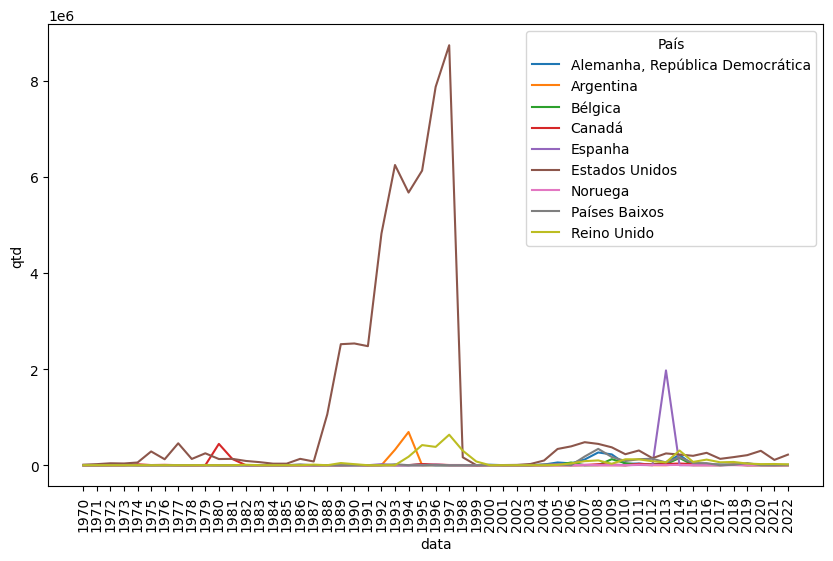

In [39]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'data', y='qtd',hue='País',data=dados_quantidade_top10_data)
plt.xticks(rotation=90)


In [40]:
(sum(dados_quantidade_top10['qtd'])/sum(dados_quantidade['qtd']))*100

94.92085955606751

In [41]:
dados_valor

,País,data,qtd,Medida
256,Afeganistão,1970.1,0,Valor
257,África do Sul,1970.1,0,Valor
258,"Alemanha, República Democrática",1970.1,0,Valor
259,Angola,1970.1,0,Valor
260,Anguilla,1970.1,0,Valor
...,...,...,...,...
13691,Tuvalu,2022.1,0,Valor
13692,Uruguai,2022.1,997367,Valor
13693,Vanuatu,2022.1,0,Valor
13694,Venezuela,2022.1,32351,Valor


In [42]:
dados_valor_top10 = dados_valor.groupby(by='País').sum()
dados_valor_top10

C:\Users\Antonio Ferrazzoli\AppData\Local\Temp\ipykernel_11368\1733278891.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados_valor_top10 = dados_valor.groupby(by='País').sum()


,qtd
País,
Afeganistão,46
"Alemanha, República Democrática",3121585
Angola,4859836
Anguilla,186
Antilhas Holandesas,236397
...,...
Vanuatu,31
Venezuela,133144
Vietnã,15375


In [43]:
dados_valor_top10 = dados_valor_top10.sort_values(by='qtd',ascending=False).head(10)
dados_valor_top10

,qtd
País,
Paraguai,85606168
Estados Unidos,71504688
Rússia,25914397
Reino Unido,8317001
Japão,7043882
Angola,4859836
China,4778033
Países Baixos,4287747
Espanha,3867723


In [44]:
dados_quantidade_top10


,qtd
País,
Paraguai,115543747
Estados Unidos,55258958
Rússia,39808014
Japão,8198936
Angola,5819857
Reino Unido,3452430
China,2517500
Espanha,2015003
Haiti,1796653


In [45]:
(sum(dados_valor_top10['qtd'])/sum(dados_valor['qtd']))*100

90.50957465538461

In [46]:
df_dados_join = pd.merge(dados_quantidade_top10

TypeError: merge() missing 1 required positional argument: 'right'